In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vcol(v):
    return v.reshape(v.size, 1)
def vrow(v):
    return v.reshape(1, v.size)
def cov(D):
    mu = D.mean(axis=1)
    DC = D - vcol(mu)
    C = np.dot(DC, DC.T) / D.shape[1]
    return C

In [3]:
def logpdf_GAU_ND_sing(x, mu, C):
    """
    x: data matrix of shape (M, 1)
    mu: numpy array of shape (M, 1)
    C: numpy array of shape (M, M) representing the covariance matrix
    """
    M = x.shape[0]
    C_inv = np.linalg.inv(C)
    sign, slogdet = np.linalg.slogdet(C)
    C_inv, sign, slogdet
    factor1 = - (M/2) * np.log(2 * np.pi)
    factor2 = - 0.5 * slogdet
    factor3 = - 0.5 * np.dot(np.dot((x - mu).T, C_inv), (x - mu))

    return factor1 + factor2 + factor3
    
def logpdf_GAU_ND(x, mu, C):
    """
    x: data matrix of shape (M, n)
    mu: numpy array of shape (M, 1)
    C: numpy array of shape (M, M) representing the covariance matrix
    """
    M = x.shape[0]
    C_inv = np.linalg.inv(C) # shape (M, M)
    _, slogdet = np.linalg.slogdet(C)
    factor1 = - (M/2) * np.log(2 * np.pi)
    factor2 = - 0.5 * slogdet
    
    diff = x.T - mu # x.T shape (n, M), mu.T shape (1, M), diff shape (n, M)
    
    product = np.dot(C_inv, diff.T) # C_inv shape (M, M), diff.T shape (M, n), product shape (M, n)
    factor3 = -0.5 * np.sum(diff.T * product, axis=0)  # diff.T shape (M, n), product shape (M, n), result shape (n,)
    return factor1 + factor2 + factor3
    
def loglikelihood(x, mu, C):
    return np.sum(logpdf_GAU_ND(x, mu, C))

[[-21.51551212]]
-21.515512123484644


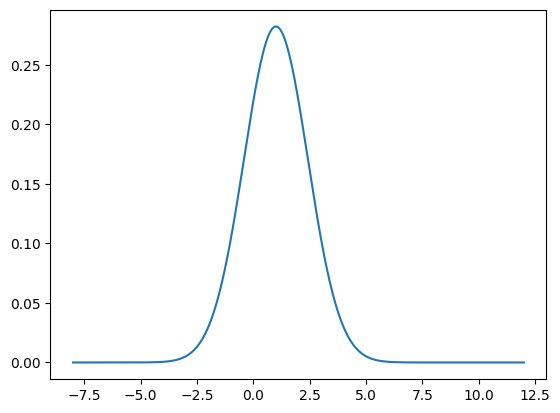

In [4]:
plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
result = logpdf_GAU_ND(vrow(XPlot), m, C)
print(logpdf_GAU_ND_sing(vrow(XPlot).T[0], m, C))
print(result[0])
plt.plot(XPlot.ravel(), np.exp(result))
plt.show()

In [5]:
pdfSol = np.load('llGAU.npy')
pdfGau = logpdf_GAU_ND(vrow(XPlot), m, C)
print(np.abs(pdfSol - pdfGau).max())

0.0


In [6]:
XND = np.load('XND.npy')
mu = np.load('muND.npy')
C = np.load('CND.npy')
pdfSol = np.load('llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(np.abs(pdfSol - pdfGau).max())

0.0


In [8]:
m_ML = XND.mean(axis=1)
C_ML = cov(XND)
loglikelihood(XND, m_ML, C_ML)

-270.70478023795044

In [9]:
X1D = np.load('X1D.npy')
m_X1D = X1D.mean()
C_X1D = cov(X1D)

In [14]:
X1D.shape, m_X1D, C_X1D

((1, 10000), 1.9539156996043356, array([[6.09542485]]))

In [15]:
np.exp(logpdf_GAU_ND(vrow(XPlot), m_X1D, C_X1D)).shape

(1000,)

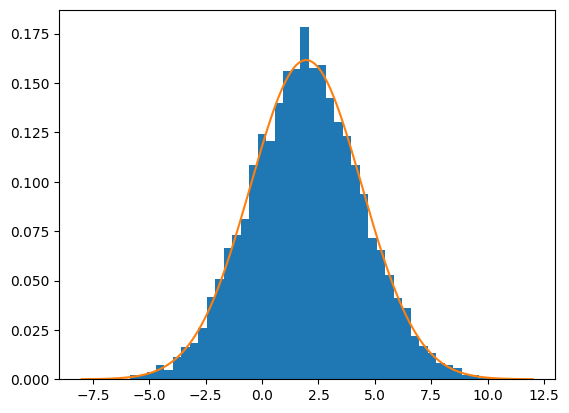

In [12]:
plt.figure()
plt.hist(X1D.ravel(), bins=50, density=True)
XPlot = np.linspace(-8, 12, 1000)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), m_X1D, C_X1D)))

In [13]:
loglikelihood(X1D, m_X1D, C_X1D)

-23227.077654602715